## Practicing Python for Machine Learning (File: practicing_python_for_ml.pdf)
Penjelasan & Penyelesaian Latihan:

Latihan Python untuk workflow machine learning dasar.

Topik: pemuatan data, preprocessing, visualisasi, pelatihan model (Linear Regression, KNN), dan evaluasi.

Latihan:

Disediakan beberapa contoh kode dan tugas.

Diselesaikan:

Memuat dataset menggunakan pandas.

Preprocessing (menangani data hilang, encoding kategori).

Visualisasi menggunakan matplotlib.

Melatih model Linear Regression.

Evaluasi menggunakan MAE dan RMSE.

Melatih model KNN dan menguji prediksi.

## Linear Regression dan K-Nearest Neighbors (KNN) untuk Prediksi Harga Rumah

### Dataset

Dataset yang digunakan adalah Boston Housing. Dataset ini memiliki fitur seperti:
- RM: Rata-rata jumlah kamar per rumah
- LSTAT: Persentase populasi status sosial ekonomi rendah
- PTRATIO: Rasio murid terhadap guru
- MEDV: Nilai median dari rumah (dalam ribuan dolar)
### Langkah-langkah yang Dilakukan

1. **Memuat dan Mengeksplorasi Data**
   Data dimuat menggunakan pandas dan dilakukan pemeriksaan terhadap nilai yang hilang. Analisis awal dilakukan untuk melihat hubungan antar variabel, misalnya antara `RM` dan `MEDV`.

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('BostonHousing.csv')

df.rename(columns={
    'crim': 'CRIM',
    'zn': 'ZN',
    'indus': 'INDUS',
    'chas': 'CHAS',
    'nox': 'NOX',
    'rm': 'RM',
    'age': 'AGE',
    'dis': 'DIS',
    'rad': 'RAD',
    'tax': 'TAX',
    'ptratio': 'PTRATIO',
    'b': 'B',
    'lstat': 'LSTAT',
    'medv': 'PRICE'  # Target/output
}, inplace=True)

# Lihat hasil
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [10]:
# Check for missing values
print(df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


2. **Visualisasi**
   Scatter plot dibuat antara `RM` (jumlah kamar) dan `PRICE` (harga rumah) untuk melihat korelasi. Terlihat pola linier positif yang menunjukkan bahwa rumah dengan lebih banyak kamar cenderung memiliki harga lebih tinggi.

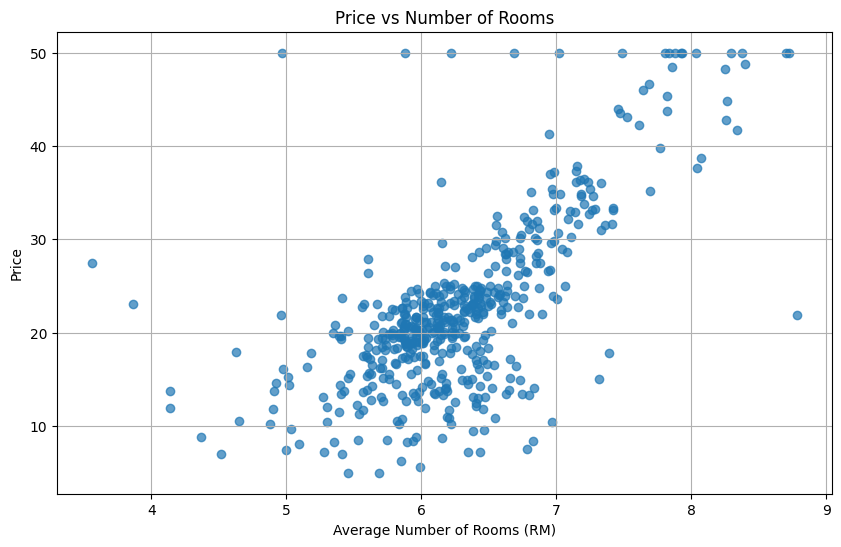

In [12]:
# Visualize features
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['PRICE'], alpha=0.7)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Price')
plt.title('Price vs Number of Rooms')
plt.grid(True)
plt.show()


### Hasil Visualisasi

- Plot Price vs Number of Rooms menunjukkan hubungan antara jumlah kamar (`RM`) dan harga rumah (`PRICE`). Pola sebar menunjukkan tren naik yang cukup jelas, mengindikasikan korelasi positif.

3. **Pra-pemrosesan**
   Data dibersihkan, fitur dipilih, dan dataset dibagi menjadi data pelatihan dan pengujian (train-test split).

In [13]:
# Split data
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. **Training Model - Linear Regression**
   Model Linear Regression dilatih pada data pelatihan. Setelah pelatihan, model digunakan untuk memprediksi harga pada data uji. Plot hasil prediksi terhadap nilai aktual dibuat untuk mengevaluasi performa model.

In [14]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")


Linear Regression MAE: 3.19
Linear Regression RMSE: 4.93


Model dievaluasi menggunakan dua metrik:
 - MAE (Mean Absolute Error)
 - RMSE (Root Mean Squared Error)

5. **Training Model - K-Nearest Neighbors (KNN)**
   Model KNN Regression juga dilatih dan diuji dengan parameter `k` tertentu (misalnya k=5). Hasil prediksi diplot bersama nilai aktual seperti pada Linear Regression.

In [15]:
# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluation
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"KNN MAE: {mae_knn:.2f}")
print(f"KNN RMSE: {rmse_knn:.2f}")


KNN MAE: 3.66
KNN RMSE: 5.09


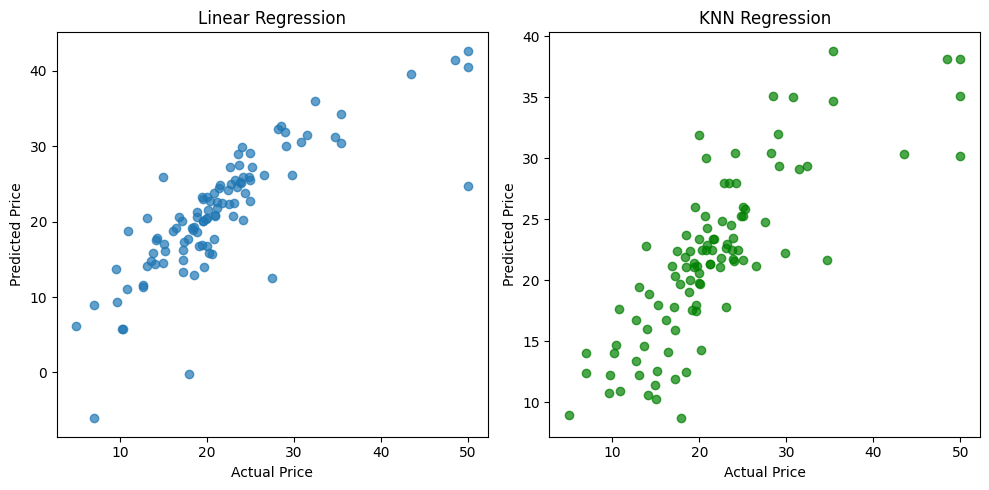

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.7, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression")

plt.tight_layout()
plt.show()


### Hasil Visualisasi

- Plot diatas membandingkan nilai prediksi dan aktual pada dua model:
   - Linear Regression: Sebagian besar prediksi dekat dengan garis diagonal, namun terdapat beberapa outlier dan nilai negatif.
   - KNN Regression: Prediksi lebih terbatas dalam jangkauan, tidak terdapat outlier ekstrim, tetapi variasi prediksi juga lebih sempit.

### Hasil Evaluasi KNN Regression

- MAE: 3.66
- RMSE: 5.09

Angka ini menunjukkan bahwa model KNN memiliki rata-rata kesalahan sekitar 3.66 ribu USD dan RMSE sekitar 5.09. Hal ini mengindikasikan bahwa KNN memiliki performa yang baik namun bisa ditingkatkan lebih lanjut.

### Hasil Evaluasi Linear Regression model

- MAE: 3.19
- RMSE: 4.93

Angka ini menunjukkan bahwa model Linear Regression memiliki rata-rata kesalahan sekitar 3.19 ribu USD (MAE) dan kesalahan kuadrat rata-rata sebesar 4.93 ribu USD (RMSE). Hal ini mengindikasikan bahwa model memiliki performa prediksi yang cukup baik, namun masih terdapat ruang untuk peningkatan, terutama dalam menangani nilai-nilai ekstrem yang menyebabkan error lebih besar.

### Kesimpulan

Model Linear Regression bekerja cukup baik untuk dataset ini karena adanya korelasi linier yang kuat antara `RM` dan `PRICE`. Model KNN memberikan hasil yang lebih konservatif namun stabil, meskipun dengan akurasi sedikit lebih rendah. Pemilihan model dapat disesuaikan berdasarkan konteks dan kebutuhan prediksi.
